<a href="https://colab.research.google.com/github/huynhspm/Machine_Learning/blob/main/Logistic%20Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/huynhspm/Machine_Learning

Cloning into 'Machine_Learning'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 36 (delta 5), reused 27 (delta 3), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [ ]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
# Load data
data = pd.read_csv('/content/Machine_Learning/Logistic Regression/Logistic_Regression.csv')

print(data.head(5))

# convert DataFrame to Numpy
data = data.values

   Lương  Thời gian làm việc  Cho vay
0     10                 1.0        1
1      5                 2.0        1
2      6                 1.8        1
3      7                 1.0        1
4      8                 2.0        1


In [ ]:
N, d = data.shape
x = data[:, 0 : d - 1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

print(x.shape, y.shape)

(20, 2) (20, 1)


Text(0, 0.5, 'kinh nghiệm (năm)')

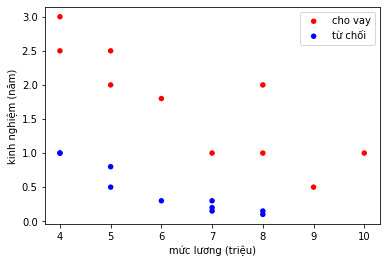

In [ ]:
# plot data by scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [ ]:
# Add a column-bias (full 1) to x
X = np.concatenate((np.ones((N, 1)), x), axis = 1)

# initial value of parameter
w = np.array([0., 0.1, 0.1]).reshape(-1, 1)

print(X.shape)
print(w.shape)

(20, 3)
(3, 1)


In [ ]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# predict
def predict(x, w):
    return sigmoid(np.dot(X, w))

# calculate gradient
def grad(x, y_predict, y):
    return np.dot(x.T, y_predict - y)	 

# calculate loss function
def loss(y_predict, y):
    #cross_entropy
    error = np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict))
    return -np.sum(error)

def RMSELoss(y_predict, y):
    N = y.shape[0]
    rmse = np.sum((y_predict - y) ** 2)
    rmse = np.sqrt(rmse / N)
    return rmse

In [ ]:
# number of iteration of gradient descent
numOfIteration = 1000
cost = []
rmseLoss = []
learning_rate = 0.01

for i in range(1, numOfIteration):
    
	 # calculate predicted value
    y_predict = predict(X, w)
                        
    cost.append(loss(y_predict, y))
    rmseLoss.append(RMSELoss(y_predict, y))

    # calculate Gradient descent
    w = w - learning_rate * grad(X, y_predict, y)

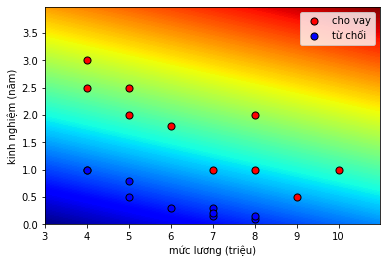

In [ ]:
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

# plot boundary

xm = np.arange(3, 11, 0.025)
ym = np.arange(0, 4, 0.025)

xm, ym = np.meshgrid(xm, ym)
zm = w[0] + w[1] * xm + w[2] * ym

CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

# plot data points

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='black', s=50, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='black', s=50, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

plt.show()

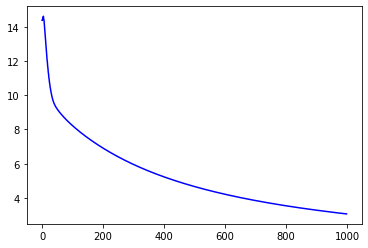

In [ ]:
# plot loss function over iterators
arr = [i for i in range(len(cost))]
arr = np.array([arr]).T
plt.plot(arr, cost, 'b')
plt.show()


Text(0, 0.5, 'rmseLoss')

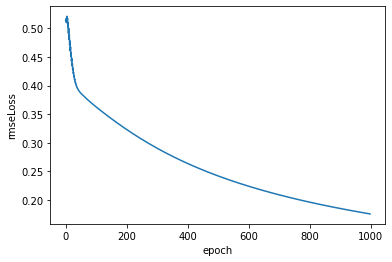

In [ ]:
# plot RMSEloss function over iterators
plt.plot(rmseLoss)
plt.xlabel('epoch')
plt.ylabel('rmseLoss')